In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
m = [350, 400, 450, 500, 550, 600, 650, 700]
cs10 = np.array([1.818, 1.274, 0.9022, 0.6552, 0.4828, 0.36, 0.2706, 0.2071]) * 1000
cs05 = np.array([0.4545, 0.3185, 0.2255, 0.1638, 0.1207, 0.08999, 0.06764, 0.05178]) * 1000
cs01 = np.array([0.01818, 0.01274, 0.009022, 0.006552, 0.004828, 0.0036, 0.002706, 0.002071]) * 1000

tta = np.array([0.04707, 0.03535, 0.02634, 0.02017, 0.01524, 0.012, 0.009389, 0.007372]) * 1000
tth = np.array([0.0297, 0.02229, 0.01735, 0.01363, 0.01078, 0.008763, 0.007068, 0.005723]) * 1000

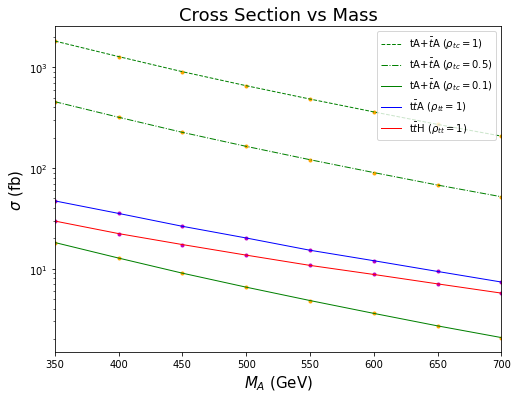

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(m, cs10, marker='.', c = 'orange')
plt.scatter(m, cs05, marker='.', c = 'orange')
plt.scatter(m, cs01, marker='.', c = 'orange')
plt.scatter(m, tta, marker='.', c = 'm')
plt.scatter(m, tth, marker='.', c = 'm')
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(m, cs10, 'g--', label=r'tA+$\bar{t}$A ($\rho_{tc}=1$)', linewidth=1)
plt.plot(m, cs05, 'g-.', label=r'tA+$\bar{t}$A ($\rho_{tc}=0.5$)', linewidth=1)
plt.plot(m, cs01, 'g-', label=r'tA+$\bar{t}$A ($\rho_{tc}=0.1$)', linewidth=1)
plt.plot(m, tta, 'b-', label=r't$\bar{t}$A ($\rho_{tt}=1$)', linewidth=1)
plt.plot(m, tth, 'r-', label=r't$\bar{t}$H ($\rho_{tt}=1$)', linewidth=1)
plt.title('Cross Section vs Mass', fontsize=18)
plt.xlabel(r'$M_{A}$ (GeV)', fontsize=15)
plt.ylabel(r'$\sigma$ (fb)', fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [5]:
mt, mc, mu, v, mZ, mh, g, mW, sw, GF, Vtb = 172, 1.29, 2.16*(10**(-3)), 246, 91.19, 125.3, 0.65, 80.35, np.sqrt(0.23), 1.166*(10**(-5)), 0.9999
KAZH, KAZh, lHhh = 0, -g/(2*np.sqrt(1-sw**2))*1, 0

def lamda(x, y, z):
    return x**2 + y**2 + z**2 - 2*x*y - 2*y*z - 2*x*z
# A -> ttbar decay
def DecayWidthAtt(rtt, MA, mt, Nc):
    return (Nc* np.sqrt(lamda(MA**2, mt**2, mt**2))) / (8*np.pi*(MA**3)) * ((np.abs(-np.complex(0, rtt)/np.sqrt(2)))**2 * MA**2)
# A -> tcbar+tbarc decay
def DecayWidthAtc(rtc, MA, Nc):
    return Nc*(np.sqrt(lamda(MA**2, mt**2, mc**2)) / (8*np.pi*(MA**3)))*(1/8)*(rtc**2 * (MA**2 - (mt+mc)**2) + (rtc)**2 *(MA**2 - (mt-mc)**2))
# H -> ttbar decay 
def DecayWidthHtt(rtt, MH, mt, Nc):
    return (Nc* np.sqrt(lamda(MH**2, mt**2, mt**2)) / (8*np.pi*MH**3)) * (((1/np.sqrt(2)* rtt)**2 * (MH**2 - (mt+mt)**2)))
# H -> tcbar + tbarc decay
def DecayWidthHtc(rtc, MH, Nc):
    return (Nc*np.sqrt(lamda(MH**2, mt**2, mc**2))/(8*np.pi*MH**3))*(1/8)*(rtc**2 * (MH**2 - (mt+mc)**2) + rtc**2 * (MH**2- (mt-mc)**2))
# A -> tubar+tbaru decay
def DecayWidthAtu(rtu, MA, Nc):
    return Nc*(np.sqrt(lamda(MA**2, mt**2, mu**2)) / (8*np.pi*(MA**3)))*(1/8)*(rtu**2 * (MA**2 - (mt+mu)**2) + (rtu)**2 *(MA**2 - (mt-mu)**2))
# A -> HZ 
def DecayWidthAZH(KAZH, MA, MH):
    return (MA**3) * (KAZH**2) * (lamda(1, ((MH**2/MA**2)), (mZ**2/MA**2)))**(3/2) / (16*np.pi*mZ**2)
def DecayWidthAZh(KAZh, MA, MH):
    return (MA**3) * (KAZh**2) * (lamda(1, ((mh**2/MA**2)), (mZ**2/MA**2)))**(3/2) / (16*np.pi*mZ**2)
# total decay width for A
def DecayWidthAtot(rtt, rtu, rtc, KAZH, KAZh, MA, MH):
    rtotA = 0
    if MA > mt+mc:
        rtotA += 2*DecayWidthAtc(rtc, MA, 3)
    if MA > mt+mu:
        rtotA += 2*DecayWidthAtu(rtu, MA, 3)
    if MA > 2*mt:
        rtotA += DecayWidthAtt(rtt, MA, mt, 3)
    if MH > 0 and MA > MH + mZ:
        rtotA += DecayWidthAZH(KAZH, MA, MH)
    if MH > 0 and MA > mh + mZ:
        rtotA += DecayWidthAZh(KAZh, MA, MH)
    return rtotA
# H -> tubar+tbaru decay
def DecayWidthHtu(rtu, MH, Nc):
    return Nc*(np.sqrt(lamda(MH**2, mt**2, mu**2)) / (8*np.pi*(MH**3)))*(1/8)*(rtu**2 * (MH**2 - (mt+mu)**2) + (rtu)**2 *(MH**2 - (mt-mu)**2))
# H -> AZ
def DecayWidthHZA(KHAZ, MH, MA):
    return (MH)**3 * (KHAZ)**2 * (lamda(1, ((MA**2)/(MH**2)), ((mZ**2)/(MH**2))))**(3/2) / (16*np.pi*mZ**2)
# H -> hh
def DecayWidthHhh(LHhh, MH):
    return (2*LHhh)**2 * (lamda(1, ((mh**2)/(MH**2)), ((mh**2)/(MH**2))))**(1/2) / (32*np.pi*MH)
# total decay width for H
def DecayWidthHtot(rtt, rtu, rtc, KHAZ, LHhh, MA, MH):
    rtotH = 0
    if MH > mt+mc:
        rtotH += 2*DecayWidthHtc(rtc, MH, 3)
    if MH > mt+mu:
        rtotH += 2*DecayWidthHtu(rtu, MH, 3)
    if MH > 2*mt:
        rtotH += DecayWidthHtt(rtt, MH, mt, 3)
    if MH > 0 and MH > MA + mZ:
        rtotH += DecayWidthHZA(KHAZ, MH, MA)
    if MH > 2*mh:
        rtotH += DecayWidthHhh(LHhh, MH)
    return rtotH

In [6]:
ma = np.arange(350, 700+50, 50)
TotalWidthH_01 = np.array([DecayWidthHtot(1, 0, 0.1, KAZH, KAZh, element, element) for element in ma])
TotalWidthH_05 = np.array([DecayWidthHtot(1, 0, 0.5, KAZH, KAZh, element, element) for element in ma])
TotalWidthH_10 = np.array([DecayWidthHtot(1, 0, 1, KAZH, KAZh, element, element) for element in ma])

TotalWidthA_01 = np.array([DecayWidthAtot(1, 0, 0.1, KAZH, lHhh, element, element) for element in ma])
TotalWidthA_05 = np.array([DecayWidthAtot(1, 0, 0.5, KAZH, lHhh, element, element) for element in ma])
TotalWidthA_10 = np.array([DecayWidthAtot(1, 0, 1, KAZH, lHhh, element, element) for element in ma])

PartialWidthAtt = np.array([DecayWidthAtt(1, element, mt, 3) for element in ma])
PartialWidthAtc_10 = np.array([DecayWidthAtc(1, element, 3)*2 for element in ma])
PartialWidthAtc_05 = np.array([DecayWidthAtc(0.5, element, 3)*2 for element in ma])
PartialWidthAtc_01 = np.array([DecayWidthAtc(0.1, element, 3)*2 for element in ma])
PartialWidthHtt = np.array([DecayWidthHtt(1, element, mt, 3) for element in ma])
PartialWidthHtc_10 = np.array([DecayWidthHtc(1, element, 3)*2 for element in ma])
PartialWidthHtc_05 = np.array([DecayWidthHtc(0.5, element, 3)*2 for element in ma])
PartialWidthHtc_01 = np.array([DecayWidthHtc(0.1, element, 3)*2 for element in ma])

br_att_01 = PartialWidthAtt/TotalWidthA_01
br_att_05 = PartialWidthAtt/TotalWidthA_05
br_att_10 = PartialWidthAtt/TotalWidthA_10
br_atc_01 = PartialWidthAtc_01/TotalWidthA_01
br_atc_05 = PartialWidthAtc_05/TotalWidthA_05
br_atc_10 = PartialWidthAtc_10/TotalWidthA_10
br_htt_01 = PartialWidthHtt/TotalWidthH_01
br_htt_05 = PartialWidthHtt/TotalWidthH_05
br_htt_10 = PartialWidthHtt/TotalWidthH_10
br_htc_01 = PartialWidthHtc_01/TotalWidthH_01
br_htc_05 = PartialWidthHtc_05/TotalWidthH_05
br_htc_10 = PartialWidthHtc_10/TotalWidthH_10

In [40]:
# Important: for the branching ratio calculation, I let 4t all decay semileptonically.
br_twb, br_wlvl, br_wqq = 0.91, 0.105, 0.679

br_ttt_f01a = br_att_01 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f01a = br_att_01 * br_twb**4 * br_wlvl**4 * 16
br_tttc_f01a = br_atc_01 * br_twb**3 * br_wlvl**3 * 8
br_ttt_f05a = br_att_05 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f05a = br_att_05 * br_twb**4 * br_wlvl**4 * 16
br_tttc_f05a = br_atc_05 * br_twb**3 * br_wlvl**3 * 8
br_ttt_f10a = br_att_10 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f10a = br_att_10 * br_twb**4 * br_wlvl**4 * 16
br_tttc_f10a = br_atc_10 * br_twb**3 * br_wlvl**3 * 8

br_ttt_f01h = br_htt_01 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f01h = br_htt_01 * br_twb**4 * br_wlvl**4 * 16
br_tttc_f01h = br_htc_01 * br_twb**3 * br_wlvl**3 * 8
br_ttt_f05h = br_htt_05 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f05h = br_htt_05 * br_twb**4 * br_wlvl**4 * 16
br_tttc_f05h = br_htc_05 * br_twb**3 * br_wlvl**3 * 8
br_ttt_f10h = br_htt_10 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f10h = br_htt_10 * br_twb**4 * br_wlvl**4 * 16
br_tttc_f10h = br_htc_10 * br_twb**3 * br_wlvl**3 * 8

[]

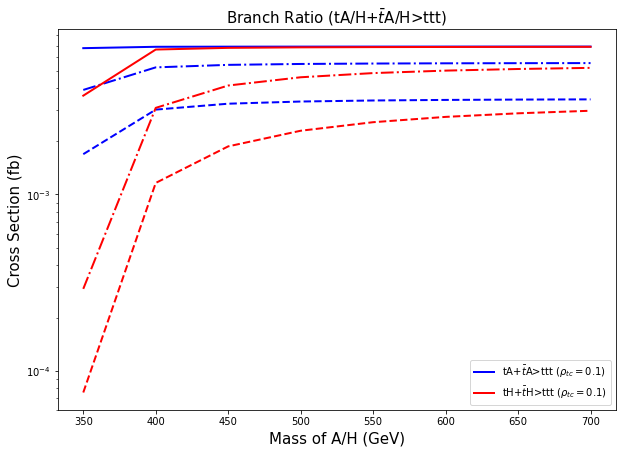

In [123]:
plt.figure(figsize=(10, 7))
plt.plot(ma, br_ttt_f01a, 'b-', linewidth=2, label=r'tA+$\bar{t}$A>ttt ($\rho_{tc}=0.1$)')
plt.plot(ma, br_ttt_f05a, 'b-.', linewidth=2)
plt.plot(ma, br_ttt_f10a, 'b--', linewidth=2)
plt.plot(ma, br_ttt_f01h, 'r-', linewidth=2, label=r'tH+$\bar{t}$H>ttt ($\rho_{tc}=0.1$)')
plt.plot(ma, br_ttt_f05h, 'r-.', linewidth=2) 
plt.plot(ma, br_ttt_f10h, 'r--', linewidth=2)
plt.xlabel('Mass of A/H (GeV)', fontsize=15)
plt.ylabel('Cross Section (fb)', fontsize=15)
plt.yscale('log')
plt.legend()
plt.title(r'Branch Ratio (tA/H+$\bar{t}$A/H>ttt)', fontsize=15)
plt.plot()

[]

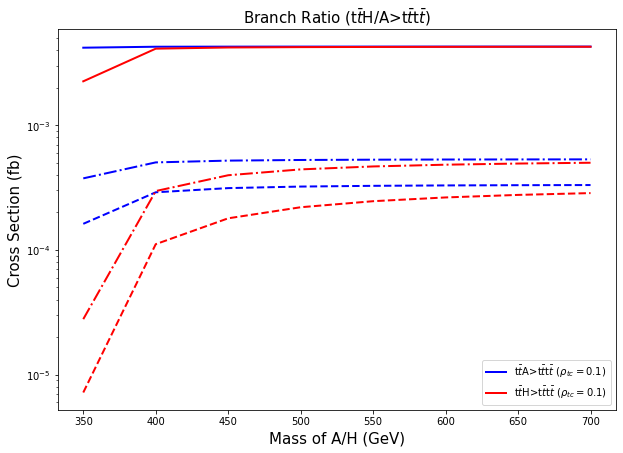

In [124]:
plt.figure(figsize=(10, 7))
plt.plot(ma, br_tttt_f01a, 'b-', linewidth=2, label=r't$\bar{t}$A>t$\bar{t}$t$\bar{t}$ ($\rho_{tc}=0.1$)')
plt.plot(ma, br_tttt_f05a, 'b-.', linewidth=2)
plt.plot(ma, br_tttt_f10a, 'b--', linewidth=2)
plt.plot(ma, br_tttt_f01h, 'r-', linewidth=2, label=r't$\bar{t}$H>t$\bar{t}$t$\bar{t}$ ($\rho_{tc}=0.1$)')
plt.plot(ma, br_tttt_f05h, 'r-.', linewidth=2) 
plt.plot(ma, br_tttt_f10h, 'r--', linewidth=2)
plt.xlabel('Mass of A/H (GeV)', fontsize=15)
plt.ylabel('Cross Section (fb)', fontsize=15)
plt.yscale('log')
plt.legend()
plt.title(r'Branch Ratio (t$\bar{t}$H/A>t$\bar{t}$t$\bar{t}$)', fontsize=15)
plt.plot()

[]

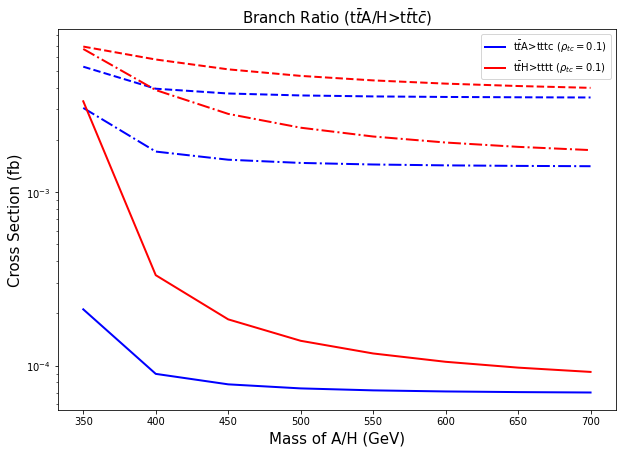

In [125]:
plt.figure(figsize=(10, 7))
plt.plot(ma, br_tttc_f01a, 'b-', linewidth=2, label=r't$\bar{t}$A>tttc ($\rho_{tc}=0.1$)')
plt.plot(ma, br_tttc_f05a, 'b-.', linewidth=2)
plt.plot(ma, br_tttc_f10a, 'b--', linewidth=2)
plt.plot(ma, br_tttc_f01h, 'r-', linewidth=2, label=r't$\bar{t}$H>tttt ($\rho_{tc}=0.1$)')
plt.plot(ma, br_tttc_f05h, 'r-.', linewidth=2) 
plt.plot(ma, br_tttc_f10h, 'r--', linewidth=2)
plt.xlabel('Mass of A/H (GeV)', fontsize=15)
plt.ylabel('Cross Section (fb)', fontsize=15)
plt.yscale('log')
plt.legend()
plt.title(r'Branch Ratio (t$\bar{t}$A/H>t$\bar{t}$t$\bar{c}$)', fontsize=15)
plt.plot()

In [94]:
cs_01 = cs01*br_ttt_f01a + tta*br_tttt_f01a + tta*br_tttc_f01a + cs01*br_ttt_f01h + tth*br_tttt_f01h + tth*br_tttc_f01h
cs_05 = cs05*br_ttt_f05a + tta*br_tttt_f05a + tta*br_tttc_f05a + cs05*br_ttt_f05h + tth*br_tttt_f05h + tth*br_tttc_f05h
cs_10 = cs10*br_ttt_f10a + tta*br_tttt_f10a + tta*br_tttc_f10a + cs10*br_ttt_f10h + tth*br_tttt_f10h + tth*br_tttc_f10h

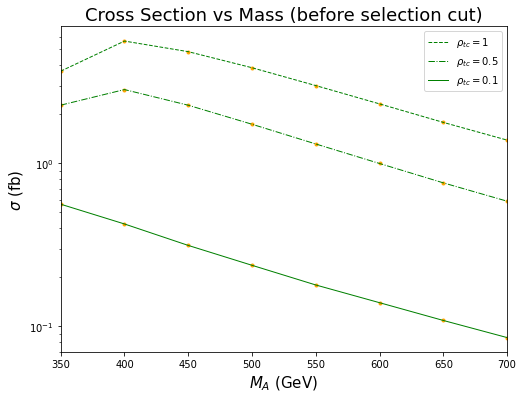

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(ma, cs_10, marker='.', c = 'orange')
plt.scatter(ma, cs_05, marker='.', c = 'orange')
plt.scatter(ma, cs_01, marker='.', c = 'orange')
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(ma, cs_10, 'g--', label=r'$\rho_{tc}=1$', linewidth=1)
plt.plot(ma, cs_05, 'g-.', label=r'$\rho_{tc}=0.5$', linewidth=1)
plt.plot(ma, cs_01, 'g-', label=r'$\rho_{tc}=0.1$', linewidth=1)
plt.title('Cross Section vs Mass (before selection cut)', fontsize=18)
plt.xlabel(r'$M_{A}$ (GeV)', fontsize=15)
plt.ylabel(r'$\sigma$ (fb)', fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [43]:
sel_eff_01 = np.array([0.026, 0.0365, 0.038625, 0.040625, 0.050125, 0.045125, 0.049250, 0.044875])
sel_eff_05 = np.array([0.013250, 0.015, 0.016375, 0.020375, 0.020375, 0.0205, 0.021625, 0.022375])
sel_eff_10 = np.array([0.012375, 0.014125, 0.019, 0.0205, 0.02, 0.0203, 0.023125, 0.02075])

[]

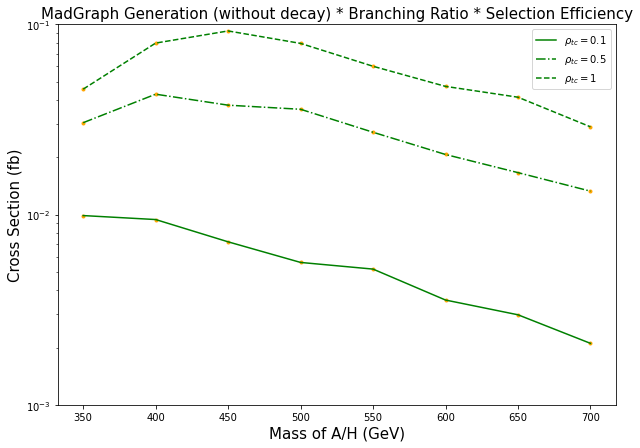

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(ma, cs_01* sel_eff_01, color='orange', marker='.')
plt.scatter(ma, cs_05 * sel_eff_05, color='orange', marker='.')
plt.scatter(ma, cs_10 * sel_eff_10, color='orange', marker='.')
plt.plot(ma, cs_01 * sel_eff_01, 'g-', label=r'$\rho_{tc}=0.1$')
plt.plot(ma, cs_05 * sel_eff_05, 'g-.', label=r'$\rho_{tc}=0.5$')
plt.plot(ma, cs_10 * sel_eff_10, 'g--', label=r'$\rho_{tc}=1$')
plt.xlabel('Mass of A/H (GeV)', fontsize=15)
plt.ylabel('Cross Section (fb)', fontsize=15)
plt.yscale('log')
plt.legend()
plt.ylim(0.001, 0.1)
plt.title('MadGraph Generation (without decay) * Branching Ratio * Selection Efficiency', fontsize=15)
plt.plot()

# Comments: Since the selection efficiency is taken from mistaken MadGraph Generation with 4t all decay semileptonically, there is still improvement to be consistent with the paper.


In [88]:
# signal 
m_A = m_H = 400
TotalWidthH_09 = DecayWidthHtot(0.9, 0, 0.9, KAZH, KAZh, m_A, m_H)
TotalWidthA_09 = DecayWidthAtot(0.9, 0, 0.9, KAZH, lHhh, m_A, m_H)
PartialWidthAtt_09 = DecayWidthAtt(1, m_A, mt, 3)
PartialWidthHtt_09 = DecayWidthHtt(1, m_H, mt, 3)
PartialWidthAtc_09 = DecayWidthAtc(1, m_A, 3)*2
PartialWidthHtc_09 = DecayWidthHtc(1, m_H, 3)*2

br_att_09 = PartialWidthAtt_09/TotalWidthA_09
br_htt_09 = PartialWidthHtt_09/TotalWidthH_09
br_atc_09 = PartialWidthAtc_09/TotalWidthA_09
br_htc_09 = PartialWidthHtc_09/TotalWidthH_09

# Calculation of 3b3l with rho_tc = rho_tt = 0.9
br_twb, br_wlvl, br_wqq = 0.91, 0.105, 0.679

br_ttt_f09a = br_att_09 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f09a = br_att_09 * br_twb**4 * br_wlvl**3 * br_wqq * 8 * 4
br_tttc_f09a = br_atc_09 * br_twb**3 * br_wlvl**3 * 8

br_ttt_f09h = br_htt_09 * br_twb**3 * br_wlvl**3 * 8
br_tttt_f09h = br_htt_09 * br_twb**4 * br_wlvl**3 * br_wqq * 8 * 4
br_tttc_f09h = br_htc_09 * br_twb**3 * br_wlvl**3 * 8

# MadGraph Generation (without decay) with rho_tt=rho_tc=0.9
cs_tA_09, cs_tH_09, cs_ttA_09, cs_ttH_09 = 1.029, 1.029, 0.02875, 0.01921

cs_09 = cs_tA_09*br_ttt_f09a + cs_ttA_09*br_tttt_f09a + cs_ttA_09*br_tttc_f09a + cs_tH_09*br_ttt_f09h + cs_ttH_09*br_tttt_f09h + cs_ttH_09*br_tttc_f09h
cs_09 * 1000 * 0.0093

0.05525367060556573